In [1]:
from IPython import display
import matplotlib

import gymnasium as gym
import matplotlib.pyplot as plt
from collections import namedtuple
from torch.utils.tensorboard import SummaryWriter
import numpy as np
from stable_baselines3 import PPO
from stable_baselines3.common.callbacks import BaseCallback
from stable_baselines3.common.logger import TensorBoardOutputFormat
from stable_baselines3.common.vec_env import SubprocVecEnv
from stable_baselines3.common.monitor import Monitor

2025-04-26 07:21:04.114743: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-26 07:21:04.121003: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745652064.127860  441984 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745652064.129954  441984 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1745652064.135637  441984 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [2]:
%load_ext tensorboard
%matplotlib inline

In [3]:
env = gym.make("Pendulum-v1", render_mode=None)
env = Monitor(env)

model = PPO("MlpPolicy", env, verbose=1, tensorboard_log='runs')
model.learn(total_timesteps=500000, progress_bar=True)
model.save("sb3_ppo_pendulum")

Using cpu device
Wrapping the env in a DummyVecEnv.
Logging to runs/PPO_2


Output()

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 200       |
|    ep_rew_mean     | -1.27e+03 |
| time/              |           |
|    fps             | 7869      |
|    iterations      | 1         |
|    time_elapsed    | 0         |
|    total_timesteps | 2048      |
----------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 200         |
|    ep_rew_mean          | -1.21e+03   |
| time/                   |             |
|    fps                  | 5327        |
|    iterations           | 2           |
|    time_elapsed         | 0           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.004354812 |
|    clip_fraction        | 0.0406      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.42       |
|    explained_variance   | 0.00824     |
|    learning_rate  

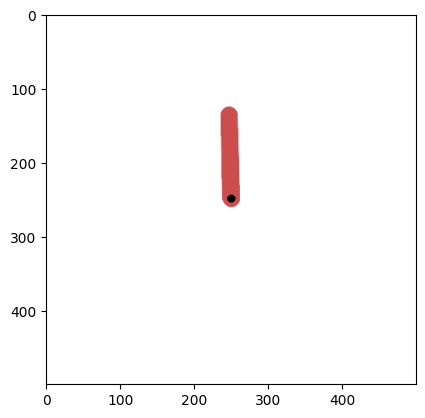

In [ ]:
env = gym.make('Pendulum-v1', render_mode='rgb_array')

obs, info = env.reset()
img = plt.imshow(env.render()) # only call this once

while True:
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, terminated, truncated, info = env.step(action)

    img.set_data(env.render()) # just update the data
    display.display(plt.gcf())
    display.clear_output(wait=True)
    
    if terminated or truncated:
        obs, info = env.reset()